In [61]:
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [58]:
# # q1 

    
class LinearRegressionTensors:
    def __init__(self, x, y, w, b, learning_rate):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.b = torch.tensor(b, requires_grad=True, dtype=torch.float32)
        self.w = torch.tensor(w, requires_grad=True, dtype=torch.float32)
        self.learning_rate = learning_rate

    def model(self):
        print(f"Initial parameters: w={self.w.item()}, b={self.b.item()}")

        loss_list = []

        for epoch in range(100):
            loss = 0.0
            for j in range(len(self.x)):
                a = self.w * self.x[j]
                y_p = a + self.b
                loss += (y_p - self.y[j])**2
            loss = loss / len(self.x)
            loss_list.append(loss.item())
            loss.backward()

            with torch.no_grad():
                self.w -= self.learning_rate * self.w.grad
                self.b -= self.learning_rate * self.b.grad
    
                self.w.grad.zero_()
                self.b.grad.zero_()

        print(f"Final parameters: w={self.w.item()}, b={self.b.item()}, loss={loss.item()}, w.grad={w.grad}, b.grad={b.grad}")
        plt.plot(loss_list)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
                             

Initial parameters: w=1.0, b=1.0
Final parameters: w=0.8068075776100159, b=0.996815025806427, loss=1.3963180780410767


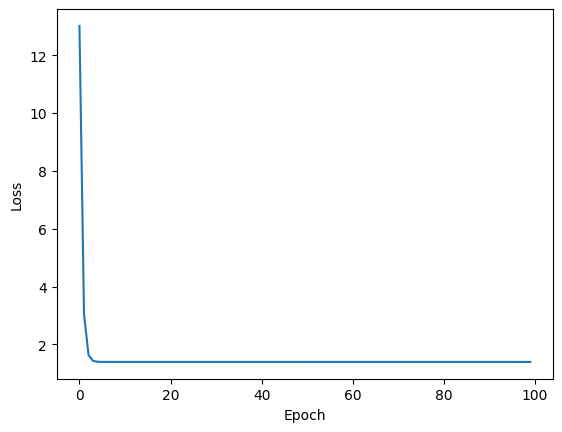

In [48]:
# q1
x = [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]
y = [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.2, 18.2]

# Instantiate and run the model
reg = LinearRegressionTensors(x, y, [1.0], [1.0], 0.001)
reg.model()

Initial parameters: w=1.0, b=1.0
Final parameters: w=8.108010292053223, b=3.084453582763672, loss=10.709705352783203, w.grad=tensor([0.]), b.grad=tensor([6.6719])


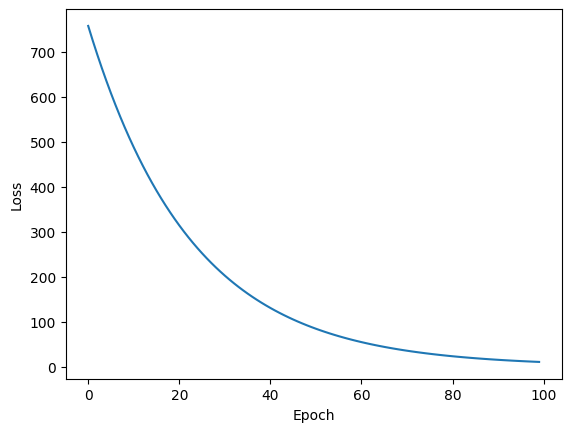

In [59]:
# q2

x = [2,4]
y = [20,40]
reg = LinearRegressionTensors(x, y, [1.0], [1.0], 0.001)
reg.model()


Epoch 100/100, Parameters: w=12.85075855255127, b=2.150007963180542, Loss=481.30621337890625


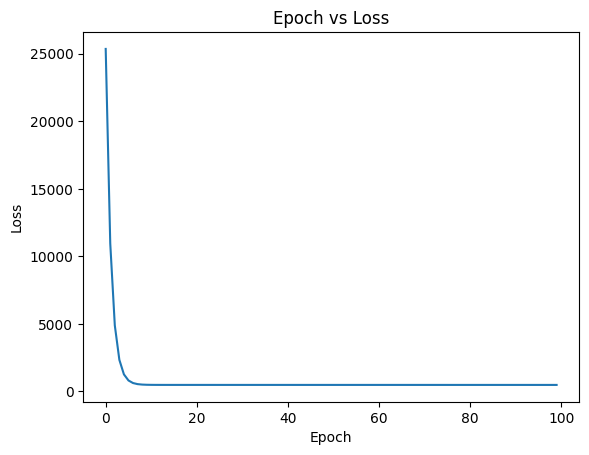

In [71]:
# q3


import torch
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self,w,b):
        self.w = torch.tensor(w, requires_grad=True,dtype=torch.float32)
        self.b = torch.tensor(b, requires_grad=True,dtype=torch.float32)

    def forward(self, x):
        return self.w * x + self.b

    def update(self, learning_rate):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, y, y_p):
        return (y - y_p)**2

# Given data
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = 0.001

# Create the model
model = RegressionModel([1.0],[1.0])

# List to store loss values for plotting
loss_list = []

# Training loop for 100 epochs
for epoch in range(100):
    loss = 0.0

    # Accumulate the loss for all samples
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += model.criterion(y[j], y_p)

    # Find the average loss
    loss /= len(x)

    # Add the loss to a list for plotting
    loss_list.append(loss.item())

    loss.backward()
    
    with torch.no_grad():
        model.update(learning_rate)
        model.reset_grad()

print(f"Epoch {epoch+1}/{100}, Parameters: w={model.w.item()}, b={model.b.item()}, Loss={loss.item()}")

# Plot the graph of epoch vs loss
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


Prediction for X1=3, X2=2: 5.547024726867676


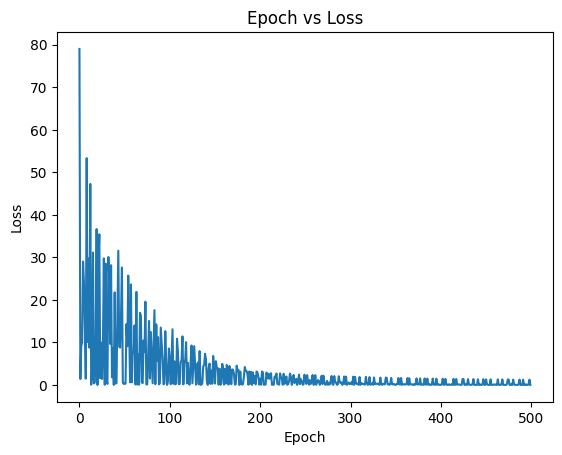

In [60]:
# Q4

class MultipleLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleLinearRegressionModel, self).__init__()
        self.w1 = nn.Parameter(torch.rand(1, requires_grad=True))
        self.w2 = nn.Parameter(torch.rand(1, requires_grad=True))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True))

    def forward(self, x1, x2):
        return self.w1 * x1 + self.w2 * x2 + self.b

    def update(self, optimizer):
        optimizer.step()
        optimizer.zero_grad()

# Given data


# Create the model
model = MultipleLinearRegressionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# List to store loss values for plotting
loss_list = []

# Training loop for 100 epochs
for epoch in range(100):
    for data in dataloader:
        x1, x2, y = data['x1'], data['x2'], data['y']
        y_p = model(x1, x2)
        loss = criterion(y_p, y)
        loss_list.append(loss.item())

        loss.backward()
        model.update(optimizer)

# Verify the answer for the data point X1=3, X2=2
with torch.no_grad():
    result = model(torch.tensor([3.0]), torch.tensor([2.0])).item()
    print(f"Prediction for X1=3, X2=2: {result}")

# Plot the graph of epoch vs loss
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


In [40]:
# q5 
# Step 1: Define the data
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.2, 18.2], dtype=torch.float32)

# Step 2: Define the linear regression model using nn.Linear()
model = nn.Linear(1, 1)  # 1 input feature, 1 output feature

# Step 3: Manually set the weight and bias
model.weight.data = torch.tensor([[1.0]])
model.bias.data = torch.tensor([1.0])

# Step 4: Define the loss function
criterion = nn.MSELoss()

# Step 5: Define the optimizer
optimizer = optim.SGD([{'params': model.parameters()}], lr=0.001)

print('Initial Parameters:')
print('Weight:', model.weight.data.item())
print('Bias:', model.bias.data.item())

# Step 6: Train the model
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x.view(-1, 1))
    loss = criterion(outputs.view(-1), y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the final parameters of the model
print('\nFinal Parameters:')
print('Weight:', model.weight.data.item())
print('Bias:', model.bias.data.item())


Initial Parameters:
Weight: 1.0
Bias: 1.0
Epoch [10/100], Loss: 1.3968
Epoch [20/100], Loss: 1.3968
Epoch [30/100], Loss: 1.3967
Epoch [40/100], Loss: 1.3967
Epoch [50/100], Loss: 1.3966
Epoch [60/100], Loss: 1.3966
Epoch [70/100], Loss: 1.3965
Epoch [80/100], Loss: 1.3964
Epoch [90/100], Loss: 1.3964
Epoch [100/100], Loss: 1.3963

Final Parameters:
Weight: 0.8068075776100159
Bias: 0.996815025806427


In [79]:
# q6


class MultipleLinearRegressionDataset(Dataset):
    def __init__(self, x1, x2, y):
        self.x1 = torch.tensor(x1, dtype=torch.float32)
        self.x2 = torch.tensor(x2, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return {'x1': self.x1[idx], 'x2': self.x2[idx], 'y': self.y[idx]}

In [80]:
x1_data = [3, 4, 5, 6, 2]
x2_data = [8, 5, 7, 3, 1]
y_data = [-3.7, 3.5, 2.5, 11.5, 5.7]

# Create dataset and DataLoader
dataset = MultipleLinearRegressionDataset(x1_data, x2_data, y_data)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

Epoch 1000: Parameters w=0.7367871999740601, b=-0.519005537033081, Loss=0.4846997559070587


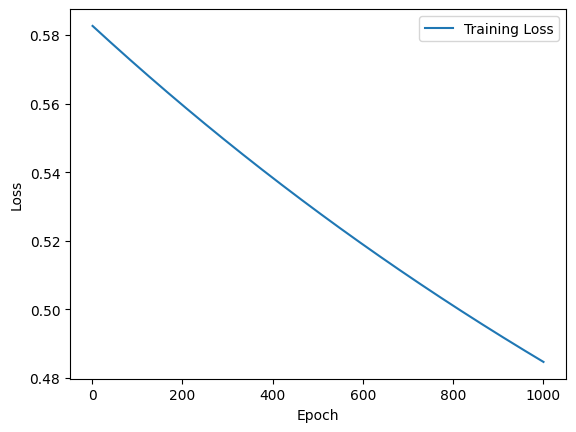

In [81]:
# q7

# Given data
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32)

# Standardize the input features
x = (x - x.mean()) / x.std()

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Instantiate the model, define the loss function, and the optimizer
model = LogisticRegressionModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 1000
loss_list = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x.view(-1, 1))

    # Compute the loss
    loss = criterion(y_pred.view(-1), y.view(-1))
    loss_list.append(loss.item())

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

print(f"Epoch {epoch+1}: Parameters w={model.linear.weight.item()}, b={model.linear.bias.item()}, Loss={loss.item()}")

# Plot the training loss
plt.plot(range(1, num_epochs + 1), loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

